In [ ]:
%%bash
wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Electronics_5.json.gz

--2020-07-17 07:08:49--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Electronics_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1251876861 (1.2G) [application/octet-stream]
Saving to: ‘Electronics_5.json.gz’

     0K .......... .......... .......... .......... ..........  0%  406K 50m13s
    50K .......... .......... .......... .......... ..........  0%  811K 37m40s
   100K .......... .......... .......... .......... ..........  0% 17.5M 25m29s
   150K .......... .......... .......... .......... ..........  0% 21.0M 19m21s
   200K .......... .......... .......... .......... ..........  0%  859K 20m14s
   250K .......... .......... .......... .......... ..........  0% 23.5M 17m0s
   300K .......... .......... .......... .......... ..........  0% 28.6M 14m40s
   350K .......... .......... .......... ..........

In [ ]:
import gzip
import json

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield json.loads(l)

PATH = 'Electronics_5.json.gz'

next(parse(PATH))

{'asin': '0151004714',
 'overall': 5.0,
 'reviewText': 'This is the best novel I have read in 2 or 3 years.  It is everything that fiction should be -- beautifully written, engaging, well-plotted and structured.  It has several layers of meanings -- historical, family,  philosophical and more -- and blends them all skillfully and interestingly.  It makes the American grad student/writers\' workshop "my parents were  mean to me and then my professors were mean to me" trivia look  childish and silly by comparison, as they are.\nAnyone who says this is an  adolescent girl\'s coming of age story is trivializing it.  Ignore them.  Read this book if you love literature.\nI was particularly impressed with  this young author\'s grasp of the meaning and texture of the lost world of  French Algeria in the 1950\'s and \'60\'s...particularly poignant when read in  1999 from another ruined and abandoned French colony, amid the decaying  buildings of Phnom Penh...\nI hope the author will write many 

This is how the reviews look like in Amazon.com

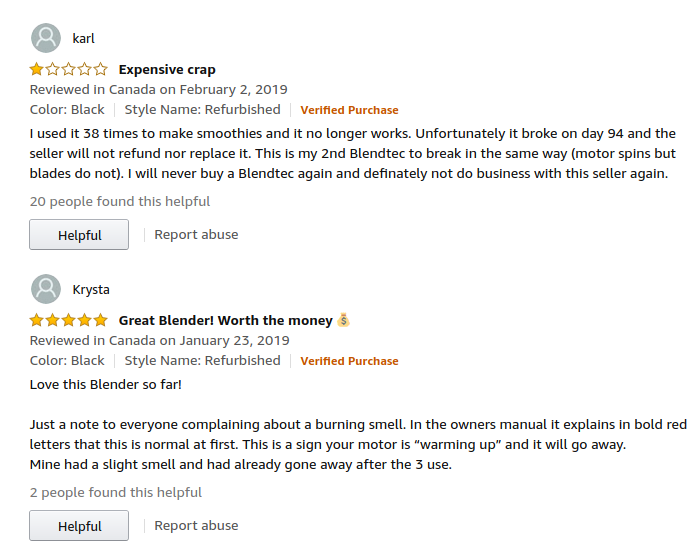![alt text](https://)


In [ ]:
def take_n(n):
    fields = ['asin', 'overall', 'summary', 'reviewText']
    raw = []
    for i, review in enumerate(parse(PATH)):
        raw.append({k: v for k,v in review.items() if k in fields})
        if i > n:
            break
    return raw

take_n(5)

[{'asin': '0151004714',
  'overall': 5.0,
  'reviewText': 'This is the best novel I have read in 2 or 3 years.  It is everything that fiction should be -- beautifully written, engaging, well-plotted and structured.  It has several layers of meanings -- historical, family,  philosophical and more -- and blends them all skillfully and interestingly.  It makes the American grad student/writers\' workshop "my parents were  mean to me and then my professors were mean to me" trivia look  childish and silly by comparison, as they are.\nAnyone who says this is an  adolescent girl\'s coming of age story is trivializing it.  Ignore them.  Read this book if you love literature.\nI was particularly impressed with  this young author\'s grasp of the meaning and texture of the lost world of  French Algeria in the 1950\'s and \'60\'s...particularly poignant when read in  1999 from another ruined and abandoned French colony, amid the decaying  buildings of Phnom Penh...\nI hope the author will write ma

In [ ]:
import re

def clean(text):
    text = text.lower()
    text = re.sub(r"'", '', text)
    text = re.sub(r'[^a-z0-9?.!]', ' ', text)    # only alnum & interpunction
    text = re.sub(r'([a-z]+)' , r' \1 ', text)   # spaces before & after words
    text = re.sub(r'([^\w\s])\1+', r'\1', text)  # remove repeated chars
    text = re.sub(r'\d+', 'NUM', text)           # replace numbers with tokens
    text = re.sub(r'\s+', ' ', text)             # remove extra spaces
    return text

def split_sentences(text):
    return re.sub(r'([.?!])', r'SEP', text).split('SEP')

def extract_words(text):
    return [sentence.strip().split(' ') for sentence in text if sentence != '']

def preprocess(text):
    text = clean(text)
    text = split_sentences(text)
    text = extract_words(text)
    return text

for review in take_n(5):
    print(preprocess(review['reviewText']))

[['this', 'is', 'the', 'best', 'novel', 'i', 'have', 'read', 'in', 'NUM', 'or', 'NUM', 'years'], ['it', 'is', 'everything', 'that', 'fiction', 'should', 'be', 'beautifully', 'written', 'engaging', 'well', 'plotted', 'and', 'structured'], ['it', 'has', 'several', 'layers', 'of', 'meanings', 'historical', 'family', 'philosophical', 'and', 'more', 'and', 'blends', 'them', 'all', 'skillfully', 'and', 'interestingly'], ['it', 'makes', 'the', 'american', 'grad', 'student', 'writers', 'workshop', 'my', 'parents', 'were', 'mean', 'to', 'me', 'and', 'then', 'my', 'professors', 'were', 'mean', 'to', 'me', 'trivia', 'look', 'childish', 'and', 'silly', 'by', 'comparison', 'as', 'they', 'are'], ['anyone', 'who', 'says', 'this', 'is', 'an', 'adolescent', 'girls', 'coming', 'of', 'age', 'story', 'is', 'trivializing', 'it'], ['ignore', 'them'], ['read', 'this', 'book', 'if', 'you', 'love', 'literature'], ['i', 'was', 'particularly', 'impressed', 'with', 'this', 'young', 'authors', 'grasp', 'of', 'the'

In [ ]:
asin = '0151004714'

review_count = 0
reviews = []
for review in parse(PATH):
    review_count += 1
    if review['asin'] == asin:
        reviews.append(preprocess(review['reviewText']))

review_count, len(reviews)

(6739590, 5)

In [ ]:
from collections import Counter

review_count = 0
word_counter = Counter()
wounds_in_sentence_counter = Counter()
review_len_counter = Counter()
review_counter = Counter()

for review in parse(PATH):
    try:
        parsed = preprocess(review['reviewText'])
        for sentence in parsed:
            wounds_in_sentence_counter[len(sentence)] += 1
            for word in sentence:
                word_counter[word] += 1

        review_count += 1
        review_len_counter[len(parsed)] += 1
        review_counter[review['asin']] += 1
    except KeyError:
        pass

review_count

6738237

In [ ]:
review_count

6738237

In [ ]:
review_len_counter.most_common(20)

[(1, 1914698),
 (2, 1198502),
 (3, 919597),
 (4, 634991),
 (5, 436247),
 (6, 312600),
 (7, 232620),
 (8, 177403),
 (9, 137811),
 (10, 110389),
 (11, 88835),
 (12, 72972),
 (13, 60887),
 (14, 51114),
 (15, 43376),
 (16, 36812),
 (17, 31817),
 (18, 27586),
 (19, 24052),
 (20, 21455)]

In [ ]:
wounds_in_sentence_counter.most_common(20)

[(7, 1552813),
 (8, 1548830),
 (6, 1542459),
 (9, 1531869),
 (10, 1505341),
 (5, 1499418),
 (11, 1472275),
 (2, 1443336),
 (12, 1426978),
 (4, 1424288),
 (13, 1387597),
 (14, 1306094),
 (3, 1243450),
 (15, 1231671),
 (16, 1145169),
 (17, 1059881),
 (1, 1017872),
 (18, 971650),
 (19, 886507),
 (20, 810214)]

In [ ]:
word_counter.most_common(200)

[('the', 22537074),
 ('i', 12769027),
 ('and', 11929536),
 ('to', 11848458),
 ('a', 11600454),
 ('NUM', 10656220),
 ('it', 10008904),
 ('is', 7090925),
 ('for', 6110467),
 ('this', 6071866),
 ('of', 5801112),
 ('my', 5020908),
 ('in', 4575333),
 ('with', 4488296),
 ('that', 4185110),
 ('on', 4011380),
 ('you', 3605399),
 ('but', 3405600),
 ('have', 3346987),
 ('not', 3159836),
 ('as', 2762891),
 ('was', 2687892),
 ('so', 2255360),
 ('great', 2239664),
 ('are', 2133200),
 ('very', 1907741),
 ('be', 1898759),
 ('one', 1855400),
 ('its', 1817018),
 ('good', 1774375),
 ('if', 1753878),
 ('or', 1665771),
 ('use', 1637023),
 ('at', 1614971),
 ('they', 1577600),
 ('all', 1486863),
 ('just', 1483074),
 ('up', 1458995),
 ('works', 1446967),
 ('from', 1434290),
 ('can', 1428282),
 ('like', 1378027),
 ('when', 1359361),
 ('an', 1353837),
 ('well', 1344182),
 ('had', 1330930),
 ('no', 1326278),
 ('would', 1279427),
 ('these', 1254278),
 ('will', 1231368),
 ('out', 1231326),
 ('has', 1172745),
 ('y

In [ ]:
review_counter.most_common(100)

[('B003L1ZYYW', 8613),
 ('B0019HL8Q8', 8160),
 ('B0019EHU8G', 7777),
 ('B0015DYMVO', 7378),
 ('B000VS4HDM', 6800),
 ('B00DIF2BO2', 6226),
 ('B00M55C0NS', 6215),
 ('B00BWF5U0M', 6183),
 ('B00IVPU7AO', 5986),
 ('B000BQ7GW8', 5981),
 ('B00L0YLRUW', 5696),
 ('B0043T7FXE', 5457),
 ('B010OYASRG', 5356),
 ('B000HPV3RW', 5115),
 ('B006W8U2MU', 5106),
 ('B00E055H5O', 5056),
 ('B003MTTJOY', 4845),
 ('B005DKZTMG', 4715),
 ('B0006BB9MG', 4711),
 ('B00BP5KOPA', 4624),
 ('B00004ZCJI', 4538),
 ('B00004ZCJJ', 4538),
 ('B00009KLAE', 4536),
 ('B001TH7GUU', 4503),
 ('B000FNFSPY', 4438),
 ('B00FDUHD2K', 4386),
 ('B005LDLP8W', 4346),
 ('B006JH8T3S', 4008),
 ('B00JX1ZS5O', 3967),
 ('B00CD8AFFW', 3916),
 ('B0043WJRRS', 3834),
 ('B00LLEODCK', 3777),
 ('B009SYZ8OC', 3753),
 ('B009D79VH4', 3746),
 ('B007WTAJTO', 3556),
 ('B006GWO5WK', 3550),
 ('B005LJQMCK', 3537),
 ('B00GHY5JAO', 3525),
 ('B00OAJ412U', 3512),
 ('B00HVT170U', 3446),
 ('B00OBRE5UE', 3446),
 ('B011WBI4S0', 3398),
 ('B010MS67ZG', 3397),
 ('B005HMKK